In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
import json
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [10]:
# Étape 1 : ouvrir le fichier JSON
with open("5f58f164-26dc-4293-af10-678865fe41d6.json", "r", encoding="utf-8") as f:
    data = json.load(f)

# Étape 2 : extraire la liste sous la clé "studyCorrelation"
df_study = pd.DataFrame(data["studyCorrelation"])

# Étape 3 : aperçu du tableau
print(df_study.head())

   id  hours  score
0   1   6.96     71
1   2   3.90     65
2   3   0.72     81
3   4   0.36     41
4   5   2.11     42


In [11]:
# Étape 2 : extraire la liste sous la clé "approachGains"
df_approachGains = pd.DataFrame(data["approachGains"])

# Étape 3 : aperçu du tableau
print(df_approachGains.head())

   Approach1  Approach2  Approach3  Approach4
0        3.6        8.8        4.3        6.9
1        5.0        6.4        4.3        4.6
2        4.5        7.6        4.1        5.5
3        6.0        7.0        5.4        6.1
4        4.5        7.3        4.9        7.1


In [12]:
# Moyenne et écart-type des progressions par méthode
print(df_approachGains.describe())


          Approach1     Approach2     Approach3    Approach4
count  10000.000000  10000.000000  10000.000000  10000.00000
mean       4.990530      7.006430      4.008830      6.00005
std        1.001117      1.000894      1.005344      1.00404
min        0.900000      3.100000     -0.600000      2.10000
25%        4.300000      6.300000      3.300000      5.30000
50%        5.000000      7.000000      4.000000      6.00000
75%        5.700000      7.700000      4.700000      6.70000
max        8.700000     10.500000      7.800000      9.80000


C:\Users\HP\AppData\Local\Temp\ipykernel_2804\2788128085.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Méthode', y='Progression', data=df_long, palette='Set2')


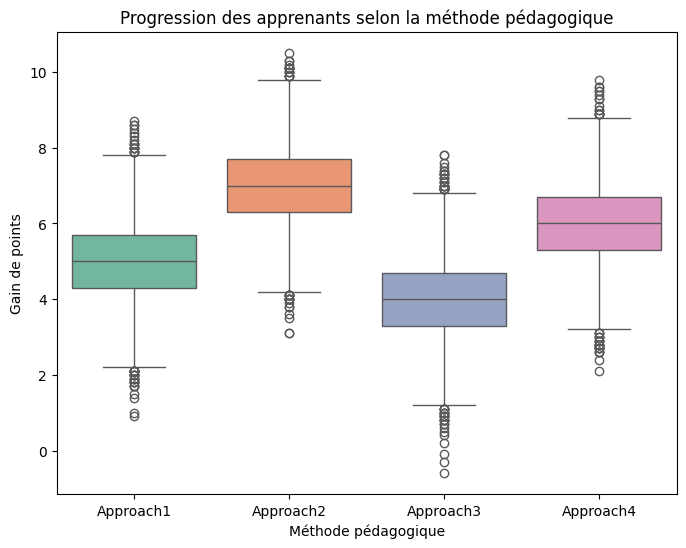

In [14]:
# Conversion du dataframe en format long pour Seaborn
df_long = df_approachGains.melt(var_name='Méthode', value_name='Progression')

# Boxplot
plt.figure(figsize=(8,6))
sns.boxplot(x='Méthode', y='Progression', data=df_long, palette='Set2')
plt.title('Progression des apprenants selon la méthode pédagogique')
plt.ylabel('Gain de points')
plt.xlabel('Méthode pédagogique')
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_2804\2406300953.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(x='Méthode', y='Progression', data=df_long, ci=95, palette='Set2')
C:\Users\HP\AppData\Local\Temp\ipykernel_2804\2406300953.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Méthode', y='Progression', data=df_long, ci=95, palette='Set2')


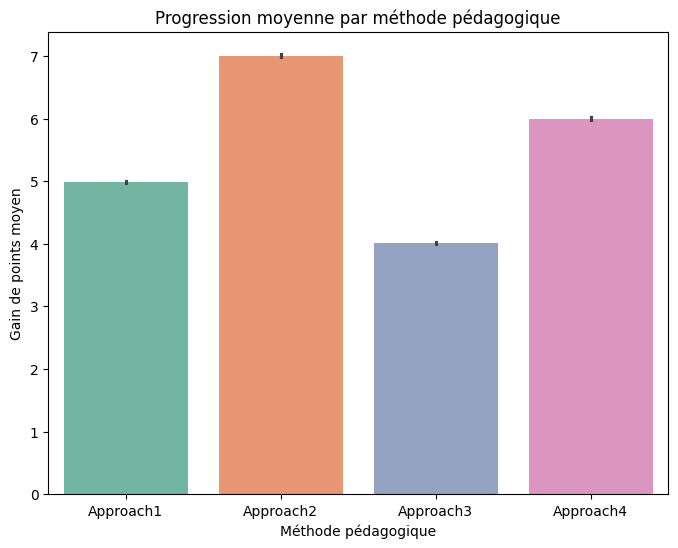

In [15]:
plt.figure(figsize=(8,6))
sns.barplot(x='Méthode', y='Progression', data=df_long, ci=95, palette='Set2')
plt.title('Progression moyenne par méthode pédagogique')
plt.ylabel('Gain de points moyen')
plt.xlabel('Méthode pédagogique')
plt.show()


In [17]:
# Test ANOVA
anova = stats.f_oneway(
    df_approachGains['Approach1'],
    df_approachGains['Approach2'],
    df_approachGains['Approach3'],
    df_approachGains['Approach4']
)

print(f"F = {anova.statistic:.2f}, p-value = {anova.pvalue:.4f}")

# Interprétation
if anova.pvalue < 0.05:
    print("✅ Il existe une différence significative de progression entre au moins deux méthodes.")
else:
    print("❌ Aucune différence significative détectée entre les méthodes.")

F = 16580.41, p-value = 0.0000
✅ Il existe une différence significative de progression entre au moins deux méthodes.


In [18]:
df_approachGains.mean()


Approach1    4.99053
Approach2    7.00643
Approach3    4.00883
Approach4    6.00005
dtype: float64

In [ ]:
# 🎯 Conclusion : Méthodes pédagogiques et progression des apprenants

# 📊 Analyse statistique :
# - Test ANOVA réalisé sur les progressions moyennes des apprenants par méthode pédagogique.
# - Résultat : F = 16580.41, p-value < 0.0001
# - ✅ Il existe une différence très significative entre au moins deux méthodes.

# 📈 Progression moyenne par méthode :
# - Approach2 : +7.01 points
# - Approach4 : +6.00 points
# - Approach1 : +4.99 points
# - Approach3 : +4.01 points

# 📝 Recommandation :
# - Généraliser Approach2, qui présente la meilleure progression moyenne.
# - Étudier la faisabilité d’étendre cette méthode à l’ensemble des parcours ou de l’expérimenter sur de nouvelles promotions.
# - Approfondir l’analyse qualitative des méthodes pour comprendre ce qui rend Approach2 plus efficace.

# 🎨 Visualisations présentées :
# - Boxplot des progressions par méthode.
# - Barplot des moyennes avec intervalle de confiance à 95%.
